                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

               Volume  
Date                   
2014-09-29  142718700  
2014-10-06  280258200  
2014-10-13  358539800  
2014-10-20  358532900  
2014-10-27  220230600  


C:\Users\Hari\AppData\Local\Temp\ipykernel_12700\21981125.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_series = time_series.resample('M').mean()


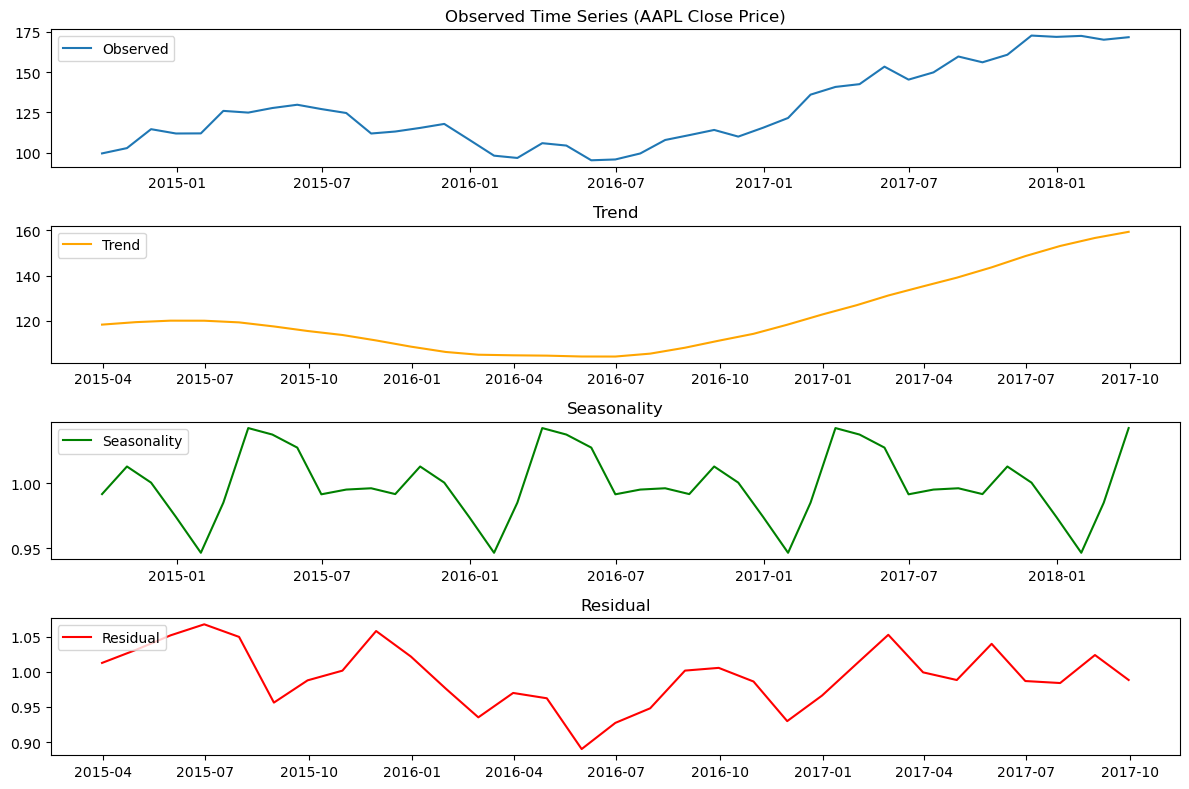

In [10]:
# Install necessary libraries (uncomment if not already installed)
# !pip install pandas matplotlib statsmodels

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df = pd.read_csv('C:\\Users\\Hari\\Desktop\\Exp06\\AAPL.csv', parse_dates=['Date'], index_col='Date')

# Display the first few rows of the dataset to check column names
print(df.head())

# Use the 'Close' price for decomposition
time_series = df['Close']

# Optional: Resample to monthly frequency to smooth and match seasonal period
time_series = time_series.resample('M').mean()

# Decompose the time series into trend, seasonal, and residual components
# Multiplicative model assumes seasonality scales with the level; use 'additive' if you prefer linear variation
decomposition = seasonal_decompose(time_series, model='multiplicative', period=12)

# Plot the decomposition
plt.figure(figsize=(12, 8))

# Plot the observed data
plt.subplot(411)
plt.plot(time_series, label='Observed')
plt.title('Observed Time Series (AAPL Close Price)')
plt.legend(loc='upper left')

# Plot the trend component
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend(loc='upper left')

# Plot the seasonal component
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.legend(loc='upper left')

# Plot the residual component
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.title('Residual')
plt.legend(loc='upper left')

# Tighten the layout and show the plot
plt.tight_layout()
plt.show()
